In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
df=pd.read_csv("/content/bank-additional.csv")
df

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"30;""blue-collar"";""married"";""basic.9y"";""no"";""ye..."
1,"39;""services"";""single"";""high.school"";""no"";""no""..."
2,"25;""services"";""married"";""high.school"";""no"";""ye..."
3,"38;""services"";""married"";""basic.9y"";""no"";""unkno..."
4,"47;""admin."";""married"";""university.degree"";""no""..."
...,...
4114,"30;""admin."";""married"";""basic.6y"";""no"";""yes"";""y..."
4115,"39;""admin."";""married"";""high.school"";""no"";""yes""..."
4116,"27;""student"";""single"";""high.school"";""no"";""no"";..."
4117,"58;""admin."";""married"";""high.school"";""no"";""no"";..."


In [7]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"30;""blue-collar"";""married"";""basic.9y"";""no"";""ye..."
1,"39;""services"";""single"";""high.school"";""no"";""no""..."
2,"25;""services"";""married"";""high.school"";""no"";""ye..."
3,"38;""services"";""married"";""basic.9y"";""no"";""unkno..."
4,"47;""admin."";""married"";""university.degree"";""no""..."


In [8]:
df.tail()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
4114,"30;""admin."";""married"";""basic.6y"";""no"";""yes"";""y..."
4115,"39;""admin."";""married"";""high.school"";""no"";""yes""..."
4116,"27;""student"";""single"";""high.school"";""no"";""no"";..."
4117,"58;""admin."";""married"";""high.school"";""no"";""no"";..."
4118,"34;""management"";""single"";""high.school"";""no"";""y..."


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   int64  
 2   marital         4119 non-null   int64  
 3   education       4119 non-null   int64  
 4   default         4119 non-null   int64  
 5   housing         4119 non-null   int64  
 6   loan            4119 non-null   int64  
 7   contact         4119 non-null   int64  
 8   month           4119 non-null   int64  
 9   day_of_week     4119 non-null   int64  
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   int64  
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [10]:
print(df.isnull().sum())

age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"    0
dtype: int64


In [16]:

df = pd.read_csv("/content/bank-additional.csv", sep=';')
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])


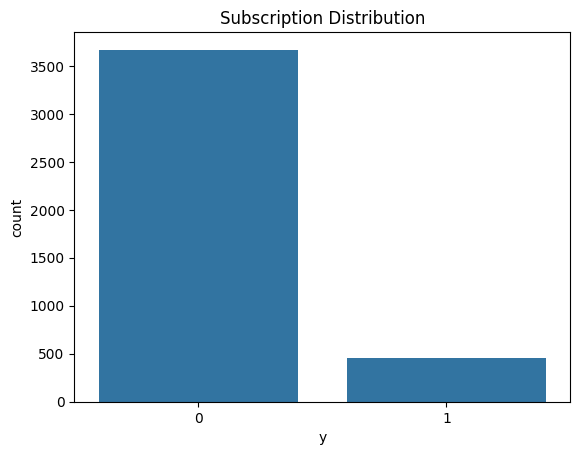

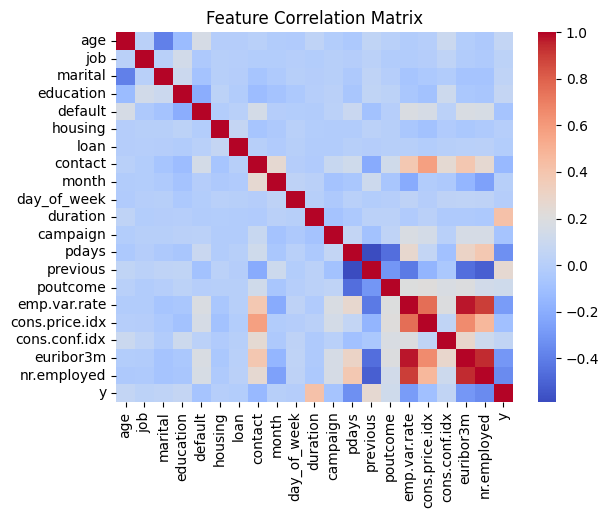

In [19]:
sns.countplot(x='y', data=df)
plt.title("Subscription Distribution")
plt.show()

sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [21]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [26]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9037216828478964
Confusion Matrix:
 [[1054   51]
 [  68   63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1105
           1       0.55      0.48      0.51       131

    accuracy                           0.90      1236
   macro avg       0.75      0.72      0.73      1236
weighted avg       0.90      0.90      0.90      1236

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1105
           1       0.55      0.48      0.51       131

    accuracy                           0.90      1236
   macro avg       0.75      0.72      0.73      1236
weighted avg       0.90      0.90      0.90      1236



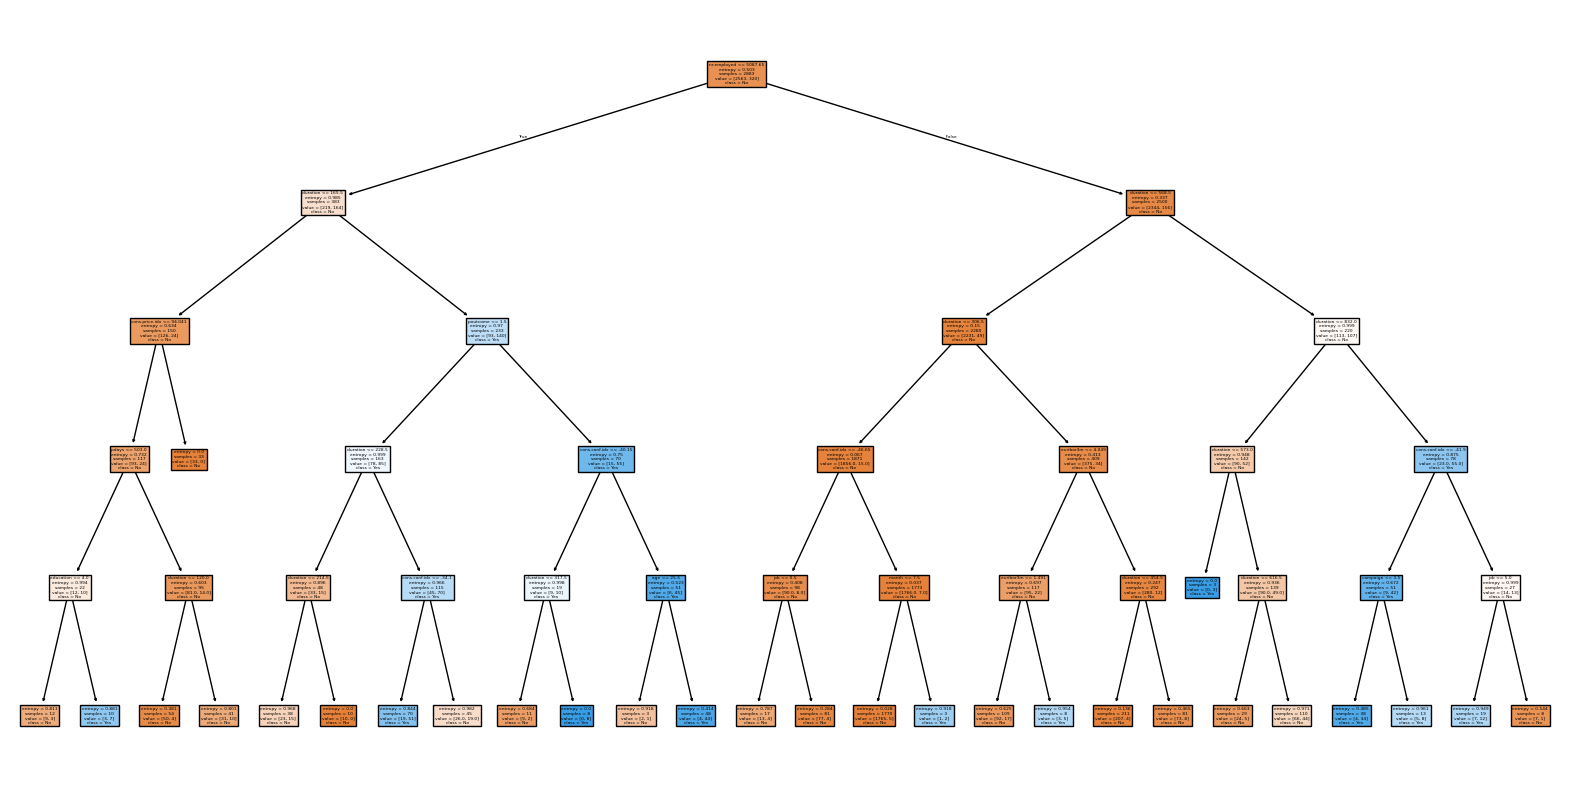

In [28]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()